In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#fetch google ticker data from yahoo finance
ticker = yf.Ticker("GOOG")
df = ticker.history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0


In [9]:
df.count()

Open            4824
High            4824
Low             4824
Close           4824
Volume          4824
Dividends       4824
Stock Splits    4824
dtype: int64

In [3]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-11 00:00:00-04:00,139.850006,142.220001,139.839996,141.699997,20146300,0.0,0.0
2023-10-12 00:00:00-04:00,142.160004,142.380005,139.449997,140.289993,18173100,0.0,0.0
2023-10-13 00:00:00-04:00,140.649994,141.339996,137.970001,138.580002,19438700,0.0,0.0
2023-10-16 00:00:00-04:00,139.729996,140.904999,139.320007,140.490005,17336000,0.0,0.0
2023-10-17 00:00:00-04:00,140.029999,141.250000,138.528702,141.110001,8822662,0.0,0.0


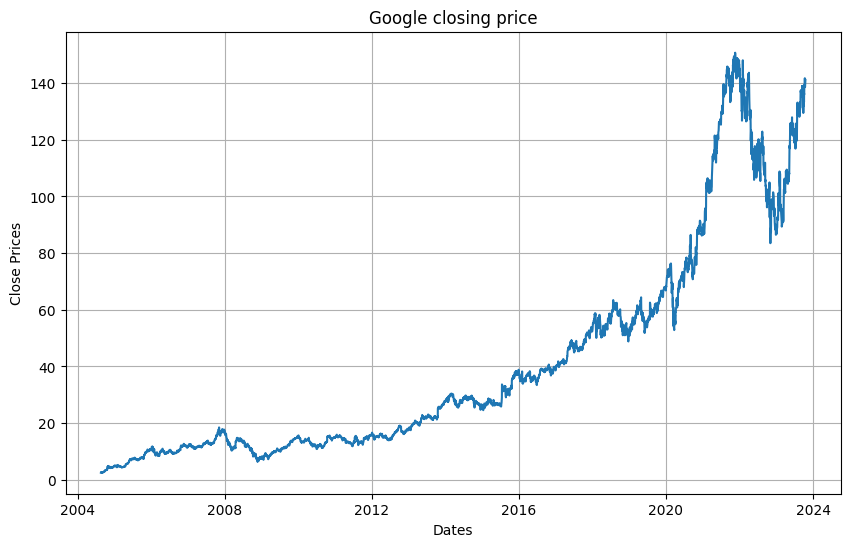

In [4]:
#plot the closing price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Google closing price')
plt.show()

### Cannot use ARMA model as the data is not stationary (mean value is incresing over time) for ARMA mean and variance should be stationary

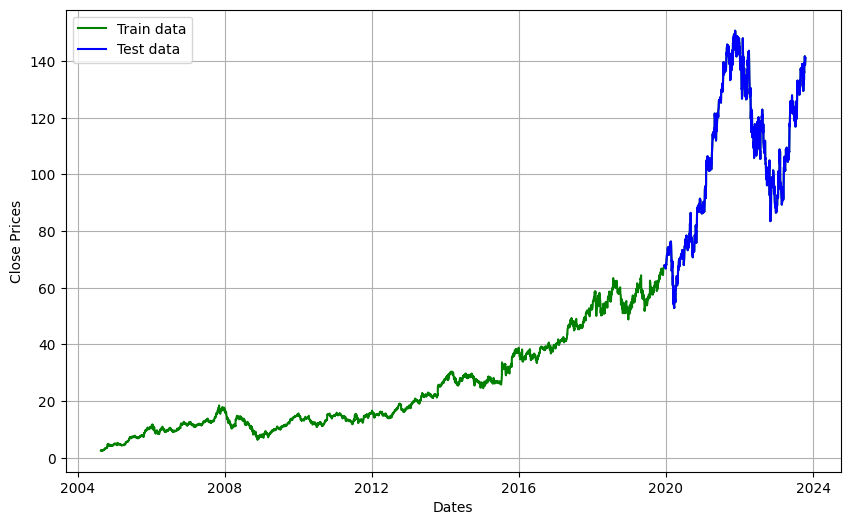

In [8]:
#arima model


from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
#split data into train and training set
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'], 'green', label='Train data')
plt.plot(test_data['Close'], 'blue', label='Test data')
plt.legend()
plt.show()

In [6]:
#train the model
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
MAE_error = mean_absolute_error(test_data, model_predictions)
print('Testing Mean Absolute Error is {}'.format(MAE_error))
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(test_data, label='Actual close price')
plt.plot(model_predictions, color='red', label='Predicted close price')
plt.title('Google stock price prediction')
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.legend()
plt.show()


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
